# Working With Surfaces #
## 1. Building Elemental Surfaces ##

In this part of the tutorial we will learn how to generate specific surfaces of elemental materials, how to find all possible surfaces up to a certain Miller index, and how to generate Wullf shapes.

Let's start by importing the necessary tools.

In [159]:
from pymatgen.core.surface import SlabGenerator, generate_all_slabs
from pymatgen.core.structure import Structure, Lattice, Molecule
from pymatgen.analysis.wulff import WulffShape
from pymatgen.analysis.adsorption import plot_slab, AdsorbateSiteFinder
from pymatgen.util.testing import PymatgenTest
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from matplotlib import pyplot as plt

%matplotlib inline


### Copper: (1, 1, 1) surface ###
Let's make an fcc Cu structure:
<table style="margin-left:10px;">
    <tr>
        <td><img src="Cu-Fm-3m-crystal-toolkit.png" style="width: 200px;"> </td>
        <td> <p style="color:blue;font-size:14px;">Cubic lattice
            <br>Lattice constant: 3.621 Å
            <br>Cu atoms at (0, 0, 0), (0, 0.5, 0.5), (0.5, 0, 0.5), (0.5, 0.5, 0)</p></td>
    </tr>
</table>

In [160]:
lattice = Lattice.cubic(3.621)
Cu = Structure(lattice, ["Cu", "Cu", "Cu", "Cu"],
               [[0,0,0], [0,0.5,0.5], 
                [0.5,0.5,0], [0.5,0,0.5]
               ])

We can now start thinking about how to represent surfaces: in <i>pymatgen</i>, this is done through slabs. A slab is a cell containing a few layers of atoms and vacuum, where the termination corresponds to the surface we are interested in.
<table style="margin-left:10px;">
    <tr>
        <td><img src="Cu_slab.png" style="width: 150px;"></td>
        <td> <p style="color:blue;font-size:14px;">Here is an example of a Cu slab corresponding to a (1, 1, 1) surface</p></td>
    </tr>
</table>
If we visualize multiple slabs instead of just one, we can see how the surface-like structure arises:
<table style="margin-left:10px;">
    <tr>
        <td><img src="Cu_slabs.png" style="width: 500px;"></td>
        <td> <p style="color:blue;font-size:14px;">The same slab from above, copied 15 times in the x and y directions, and twice in the z direction</p></td>
    </tr>
</table>

Let's now try to generate surfaces using the <i>SlabGenerator</i> class. Let's initialize it for the Cu structure we just created, with a Miller index of (1, 1, 1), a minimum slab height of 10 Å, and minimum 10 Å of vacuum.

In [161]:
slabgen_Cu = SlabGenerator(Cu, (1,1,1), 10, 10)

We can now use the <i>get_slabs()</i> method of the <i>SlabGenerator</i> class to create a list of <i>Slab</i> objects. The slabs returned by <i>get_slabs()</i> in this case correspond to all the unique terminations along the normal to the Miller plane we are interested in.
<table style="margin-left:10px;">
    <tr>
        <td><img src="Cu_normal_to_surf.png" style="width: 400px;"></td>
        <td> <p style="color:blue;font-size:14px;">The algorithm finds all unique terminations that are parallel to the (1, 1, 1) plane i.e. perpendicular to the normal. The different resulting slabs are characterized by different c shifts.</p></td>
    </tr>
</table>


In [188]:
slabs_Cu_111 = slabgen_Cu.get_slabs()

For a fcc structure such as the Cu structure we are working with, there should only be only one unique (1, 1, 1) surface. We can check if that is the case:

In [163]:
print("The Cu crystal has %s termination(s) corresponding to a (1, 1, 1) Miller index." %(len(slabs_Cu_111)))

The Cu crystal has 1 termination(s) corresponding to a (1, 1, 1) Miller index.


### Silicon: (1, 1, 1) surfaces ###
Let's now try the same thing for a diamond Silicon structure:

In [164]:
lattice = Lattice.cubic(5.46873)
Si = Structure(lattice, ["Si", "Si", "Si", "Si", 
                         "Si", "Si", "Si", "Si"],
               [[0.00000, 0.00000, 0.50000],
                [0.75000, 0.75000, 0.75000],
                [0.00000, 0.50000, 0.00000],
                [0.75000, 0.25000, 0.25000],
                [0.50000, 0.00000, 0.00000],
                [0.25000, 0.75000, 0.25000],
                [0.50000, 0.50000, 0.50000],
                [0.25000, 0.25000, 0.75000]])

Initiate the SlabGenerator class:

In [165]:
slabgen_Si = SlabGenerator(Si, (1,1,1), 10, 10)

Get all the slabs:

In [166]:
slabs_Si_111 = slabgen_Si.get_slabs()

How many terminations are there now?

In [167]:
print("The Si crystal has %s termination(s) corresponding to a (1, 1, 1) Miller index." %(len(slabs_Si_111)))

The Si crystal has 2 termination(s) corresponding to a (1, 1, 1) Miller index.


Let's visualize the two slabs to convince ourselves that they are different. For this, we can use the plot_slab function.

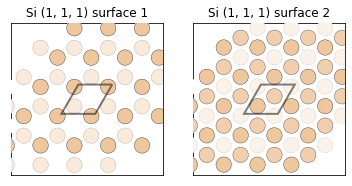

In [168]:
fig = plt.figure()
for n, slab in enumerate(slabs_Si_111):
    ax = fig.add_subplot(1, 2, n+1)
    plot_slab(slab, ax, adsorption_sites=False)
    ax.set_title("Si (1, 1, 1) surface %i" %(n+1))
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### Silicon: All surfaces ###
We can also generate all the possible surfaces up to a given Miller index. This can be achieved using the generate_all_slabs function.

Let's use it for our Si crystal with a Miller index of up to 3, a minimum slab size of 10 Å and minimum vacuum of 10 Å:

In [169]:
all_slabs_Si = generate_all_slabs(Si, 3, 10, 10)

How many slab structures did this return?

In [170]:
print("%s unique Si slab structures have been found for a maximum Miller index of 3." %(len(all_slabs_Si)))

18 unique Si slab structures have been found for a maximum Miller index of 3.


We can investigate these surfaces further. What are their Miller indices and c shifts?

In [171]:
for slab in all_slabs_Si:
    print(slab.miller_index, "%.4f" % slab.shift)

(1, 1, 1) 0.3750
(1, 1, 1) 0.8750
(3, 3, 2) 0.0833
(3, 3, 1) 0.1250
(3, 3, 1) 0.2917
(1, 1, 0) 0.2500
(3, 2, 2) 0.0417
(3, 2, 2) 0.1250
(3, 2, 1) 0.0833
(3, 2, 0) 0.0417
(3, 1, 1) 0.0417
(3, 1, 1) 0.2083
(3, 1, 0) 0.0833
(1, 0, 0) 0.1250
(2, 2, 1) 0.0625
(2, 2, 1) 0.1875
(2, 1, 1) 0.1250
(2, 1, 0) 0.0625


Notice some Miller indices are repeated. Again, this is due to there being more than one termination. However, each Miller index + c shift combination is unique.

## 2. Building Compound Surfaces 

Let's try something a little more complicated, say LiFePO<sub>4</sub>:

In [172]:
LiFePO4 = PymatgenTest.get_structure("LiFePO4")

Let's add some oxidation states to LiFePO<sub>4</sub>, this will be important when we want to take surface polarity into consideration:

In [173]:
LiFePO4.add_oxidation_state_by_element({"Fe": 2, "Li": 1, "P": 5, "O": -2})

We can now initialize an instance of the SlabGenerator class, let's choose a Miller index of (0, 0, 1) and the same minimum slab size and minimum vacuum of 10 Å:

In [174]:
slabgen = SlabGenerator(LiFePO4, (0,0,1), 10, 10)

We can now use get_slabs to generate our (0, 0, 1) slabs. Unlike before, when generating a slab of LiFePO<sub>4</sub>, we also want to be careful not break any of the P-O bonds. These bonds are strong enough that they will result in a significantly high surface energy when broken so it's reasonable to say that any terminations with such broken bonds will not yield the lowest surface energy. To implement this, we add the bonds parameter to get_slabs, a dictionary where the key will be a tuple of the two atoms whose bonds we do not want to break and the element of that value would be their maximum bond length in Å. This means that any bond between P and O less than 2 Å cannot be broken when generating slabs.

In [175]:
all_slabs = slabgen.get_slabs(bonds={("P", "O"): 2}) 

In [176]:
print("LiFePO4 has %s termination(s) corresponding to a (0, 0, 1) Miller index that do not break any high-energy P-O bonds." %(len(all_slabs)))

LiFePO4 has 5 termination(s) corresponding to a (0, 0, 1) Miller index that do not break any high-energy P-O bonds.


There are a couple of rules before we actually run calculations on some of these slab models. First off, we need to ensure that all slabs we will be calculating have the same surface on both sides. To do this, we need to ensure the slab model has Laue point group symmetry ie. contains inversion symmetry. We use the is_symmetric() property of our slab object to check this. It's important that both surfaces are the same as the above equation for surface energy is used to get the energy of one surface, hence the 1/2 factor in the equation. If the surfaces are different (the slab is not symmetric), we would be calculating the average surface energy of two different surfaces in our slab rather than the surface energy for one slab in our calculation. Secondly, for structures containing oxidation states, we need to ensure that our surfaces are nonpolar. A polar termination will lead to a very high surface energy, so we can skip those particular structures. We can check polarity using the is_polar() property of our slab object. Both these criterias (nonpolar and symmetric) should be satisfied before calculating a particular slab model.


In [177]:
for n, slab in enumerate(all_slabs):
    print("Surface %i - polar: %r, symmetric: %r" %(n+1, slab.is_polar(), slab.is_symmetric()))

Surface 1 - polar: True, symmetric: False
Surface 2 - polar: True, symmetric: False
Surface 3 - polar: True, symmetric: False
Surface 4 - polar: True, symmetric: False
Surface 5 - polar: False, symmetric: False


Notice that none of the terminations in the (001) direction do not simultaneously satisfy our two criteria so a (001) surface with a reasonable surface energy cannot be calculated. 

Now let's generate all possible slabs for a max Miller index of 2 for LiFePO<sub>4</sub> and see if any of these surfaces can be calculated to yield reasonable and accurate surface energy  values. This may take a while.

In [178]:
all_slabs = generate_all_slabs(LiFePO4, 2, 10, 10, bonds={("P", "O"): 2})

Let's see how many surfaces we have in total and how many satisfy our criteria:

In [179]:
print("LiFePO4 slabs with a Miller index of up to 2 and which do not terminate any P-O bonds")
print("Total number (including polar and asymmetric): %s" %(len(all_slabs)))

# store any slabs for calculation that satisfies our criterias
valid_slabs = []
for slab in all_slabs:
    if not slab.is_polar() and slab.is_symmetric():
        valid_slabs.append(slab)
        
print("Number of slabs that are nonpolar and symmetric: %s" %(len(valid_slabs)))

LiFePO4 slabs with a Miller index of up to 2 and which do not terminate any P-O bonds
Total number (including polar and asymmetric): 93
Number of slabs that are nonpolar and symmetric: 2


## 3. Adding adsorbates ##

TODO: add explanation as to how adsorption sites are found + types

Let's now use our Cu structure to add adsorbates to different surfaces. We can start with our previously generated Cu (1, 1, 1) surface:

In [189]:
Cu_111 = slabs_Cu_111[0]

We start by making an instance of the AdsorbateSiteFinder:

In [190]:
asf_Cu_111 = AdsorbateSiteFinder(Cu_111)

Let's use the find_adsorption_sites() method to find the relevant adsorption sites and see what it returns:

In [191]:
ads_sites = asf_Cu_111.find_adsorption_sites()
print(ads_sites)

{'ontop': [array([ 3.13229549,  1.81294709, 11.69202814])], 'bridge': [array([ 1.85446936,  1.81294709, 11.61382645])], 'hollow': [array([ 0.5798338 ,  0.33560308, 11.4834903 ]), array([ 1.85606465,  1.07427508, 11.58775922])], 'all': [array([ 3.13229549,  1.81294709, 11.69202814]), array([ 1.85446936,  1.81294709, 11.61382645]), array([ 0.5798338 ,  0.33560308, 11.4834903 ]), array([ 1.85606465,  1.07427508, 11.58775922])]}


You can see that there is a total of 4 adsorption sites: one "on top", one "bridge" and two "hollow".

Let's now visualize these adsorption sites, using plot_surface:

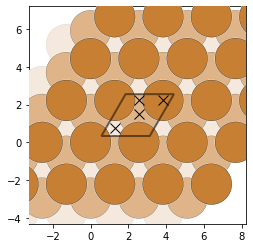

In [192]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_slab(Cu_111, ax, adsorption_sites=True)
plt.show()

We can now move on to adding adsorbates. Let's start by making a H molecule, that we can use as an adsorbate:

In [184]:
adsorbate = Molecule("H", [[0, 0, 0]])

We can now use the generate_adsorption_structures method to create adsorption structures corresponding to the 4 adsorption sites we identified. Let's keep the same slab size by setting the repeat argument to [1, 1, 1]:

In [195]:
ads_structs = asf_Cu_111.generate_adsorption_structures(adsorbate, repeat=[1, 1, 1])

Let's visualize our new adsorption structures:

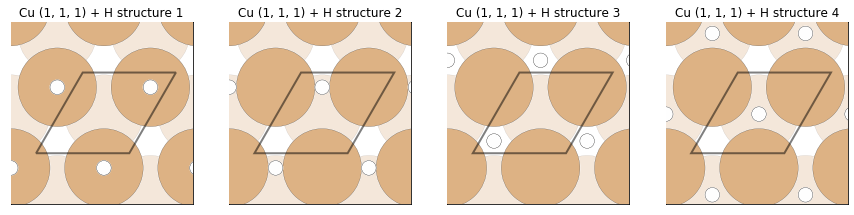

In [197]:
fig = plt.figure(figsize=[15, 60])
for n, ads_struct in enumerate(ads_structs):
    ax = fig.add_subplot(1, 4, n+1)
    plot_slab(ads_struct, ax, adsorption_sites=False)
    ax.set_title("Cu (1, 1, 1) + H structure %i" %(n+1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0,5)
    ax.set_ylim(-1,4)
plt.show()